# 3. AI Monitoring with TinyML
## 3.1 Imports and Setup
## 3.2 Synthetic SNR Dataset Generation
## 3.3 Model Architecture (Lightweight MLP)
## 3.4 Training and Evaluation
## 3.5 Export to TFLite (.tflite)
## 3.6 Convert to C Array for ESP32
## 3.7 Save Accuracy Plot and Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
def generate_snr_dataset(samples=1000):
    snr_values = np.random.uniform(0, 20, samples)
    noise_levels = 1 / (10 ** (snr_values / 10))
    features = np.stack([snr_values, noise_levels], axis=1)
    labels = (snr_values > 10).astype(int)  # 1 = good, 0 = poor
    return features, labels

X, y = generate_snr_dataset()

In [4]:
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(2,)),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5088 - loss: 0.6333 - val_accuracy: 0.5650 - val_loss: 0.5809
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5437 - loss: 0.5964 - val_accuracy: 0.5950 - val_loss: 0.5528
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5788 - loss: 0.5669 - val_accuracy: 0.6350 - val_loss: 0.5271
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6162 - loss: 0.5389 - val_accuracy: 0.7000 - val_loss: 0.5007
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6975 - loss: 0.5076 - val_accuracy: 0.7500 - val_loss: 0.4683
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7513 - loss: 0.4764 - val_accuracy: 0.7500 - val_loss: 0.4435
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7750 - loss: 0.4536 - val_accuracy: 0.8100 - val_loss: 0.4292
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7950 - loss: 0.4315 - val_accuracy: 0.8200 - val_loss

In [10]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("../tinyml_esp32/snr_classifier.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\yenug\AppData\Local\Temp\tmp02q0abjv\assets


INFO:tensorflow:Assets written to: C:\Users\yenug\AppData\Local\Temp\tmp02q0abjv\assets


Saved artifact at 'C:\Users\yenug\AppData\Local\Temp\tmp02q0abjv'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 2), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2642895490320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2642895491088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2642895489552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2642895489936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2642895491856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2642895490512: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [9]:
try:
    # Export to TFLite
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()

    # Save the model
    with open("../tinyml_esp32/snr_classifier.tflite", "wb") as f:
        f.write(tflite_model)

    print("✅ TFLite model exported successfully.")

except Exception as e:
    print("⚠️ TFLite export failed:", e)
    tflite_model = None

INFO:tensorflow:Assets written to: C:\Users\yenug\AppData\Local\Temp\tmphmj3r5xz\assets


INFO:tensorflow:Assets written to: C:\Users\yenug\AppData\Local\Temp\tmphmj3r5xz\assets


Saved artifact at 'C:\Users\yenug\AppData\Local\Temp\tmphmj3r5xz'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 2), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2642895490320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2642895491088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2642895489552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2642895489936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2642895491856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2642895490512: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ TFLite model exported successfully.


In [13]:
# Re-export model to a permanent path
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save directly to your repo folder
with open("Federated-AI-Monitored-NOMA-aided-DFrFT-OFDM-with-Index-Modulation-for-Frugal-5G-Signal-Chains-on-ES", "wb") as f:
    f.write(tflite_model)

print("✅ Model saved to tinyml_esp32/snr_classifier.tflite")

INFO:tensorflow:Assets written to: C:\Users\yenug\AppData\Local\Temp\tmp77qql1lv\assets


INFO:tensorflow:Assets written to: C:\Users\yenug\AppData\Local\Temp\tmp77qql1lv\assets


Saved artifact at 'C:\Users\yenug\AppData\Local\Temp\tmp77qql1lv'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 2), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2642895490320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2642895491088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2642895489552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2642895489936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2642895491856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2642895490512: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Model saved to tinyml_esp32/snr_classifier.tflite


In [14]:
def convert_to_c_array(tflite_model):
    hex_array = ', '.join(f'0x{b:02x}' for b in tflite_model)
    return f"const unsigned char model[] = {{ {hex_array} }};"

c_array = convert_to_c_array(tflite_model)
with open("../tinyml_esp32/model_data.h", "w") as f:
    f.write(c_array)

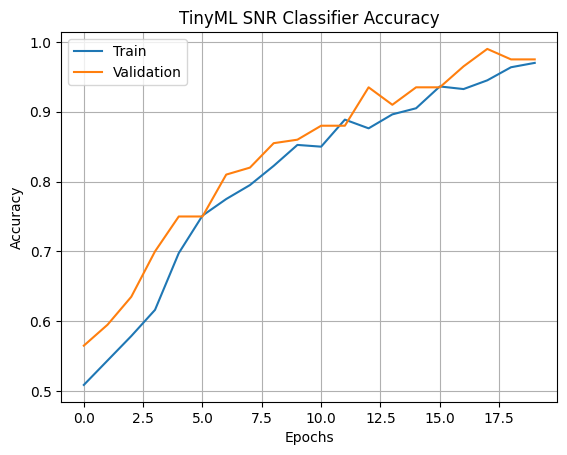

In [16]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("TinyML SNR Classifier Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.savefig("../ai_adaptation_curve.png")
plt.show()